In [1]:
import cfbd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [81]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'YOUR_API_KEY_HERE'
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_config = cfbd.ApiClient(configuration)

In [5]:
ratings_api = cfbd.RatingsApi(api_config)
elo_ratings = ratings_api.get_elo_ratings(year=2022)
sp_ratings = ratings_api.get_sp_ratings(year=2022)

In [6]:
elo_ratings[0]

{'conference': 'Mountain West',
 'elo': 1768.0,
 'team': 'Air Force',
 'year': 2022}

In [7]:
sp_ratings[0]

{'conference': 'SEC',
 'defense': {'explosiveness': None,
             'havoc': {'db': None, 'front_seven': None, 'total': None},
             'pasing': None,
             'passing_downs': None,
             'ranking': 1.0,
             'rating': 3.7,
             'rushing': None,
             'standard_downs': None,
             'success': None},
 'offense': {'explosiveness': None,
             'pace': None,
             'passing': None,
             'passing_downs': None,
             'ranking': 26.0,
             'rating': 37.2,
             'run_rate': None,
             'rushing': None,
             'standard_downs': None,
             'success': None},
 'ranking': 1.0,
 'rating': 35.3,
 'second_order_wins': None,
 'sos': None,
 'special_teams': {'rating': 1.7},
 'team': 'Georgia',
 'year': 2022}

In [9]:
elo_df = pd.DataFrame.from_records([e.to_dict() for e in elo_ratings])
elo_df.head()

,year,team,conference,elo
0,2022,Air Force,Mountain West,1768.0
1,2022,Akron,Mid-American,1154.0
2,2022,Alabama,SEC,2181.0
3,2022,Appalachian State,Sun Belt,1593.0
4,2022,Arizona,Pac-12,1374.0


In [11]:
sp_df = pd.DataFrame.from_records([dict(team=s.team, rating=s.rating) for s in sp_ratings])
sp_df.head()

,team,rating
0,Georgia,35.3
1,Michigan,32.0
2,Ohio State,31.1
3,Alabama,30.3
4,Tennessee,25.2


In [15]:
df = elo_df.merge(sp_df, left_on='team', right_on='team')
df.rename(columns={'rating': 'sp'}, inplace=True)
df.head()

,year,team,conference,elo,sp
0,2022,Air Force,Mountain West,1768.0,3.9
1,2022,Akron,Mid-American,1154.0,-23.4
2,2022,Alabama,SEC,2181.0,30.3
3,2022,Appalachian State,Sun Belt,1593.0,1.7
4,2022,Arizona,Pac-12,1374.0,-3.2


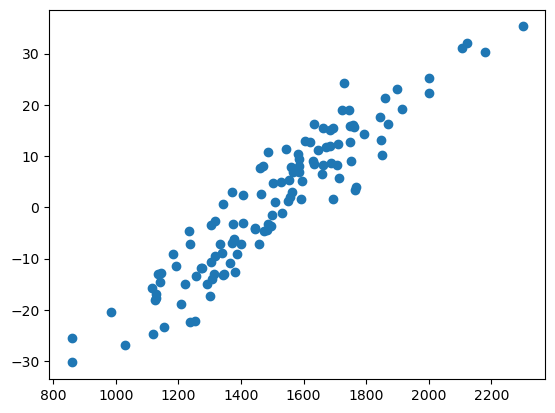

In [18]:
plt.scatter(df['elo'], df['sp'])

Text(0.5, 1.0, 'Elo and SP+ ratings (2022 season)')

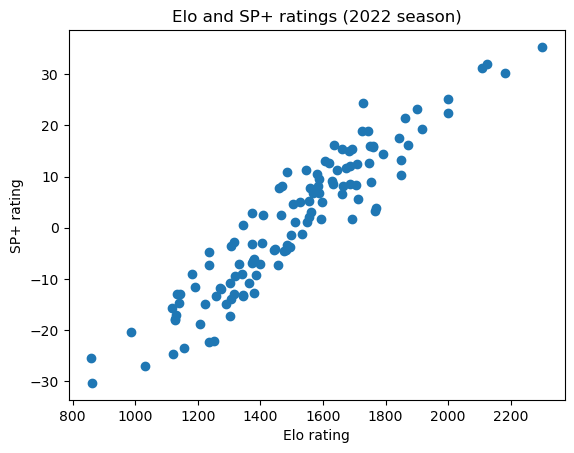

In [21]:
plt.scatter(df['elo'], df['sp'])

plt.xlabel('Elo rating')
plt.ylabel('SP+ rating')
plt.title('Elo and SP+ ratings (2022 season)')

In [22]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Elo and SP+ ratings (2022 season)')

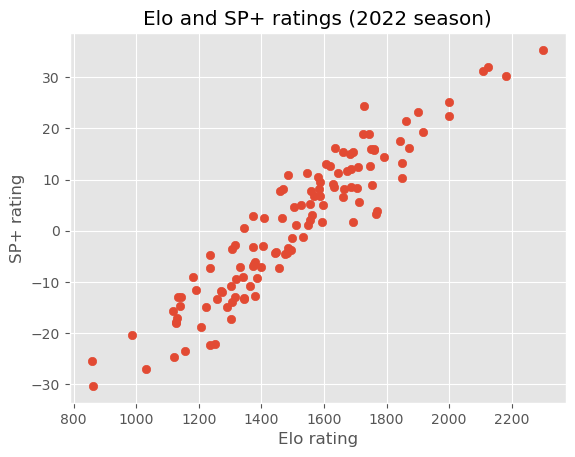

In [23]:
plt.scatter(df['elo'], df['sp'])

plt.xlabel('Elo rating')
plt.ylabel('SP+ rating')
plt.title('Elo and SP+ ratings (2022 season)')

In [24]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Elo and SP+ ratings (2022 season)')

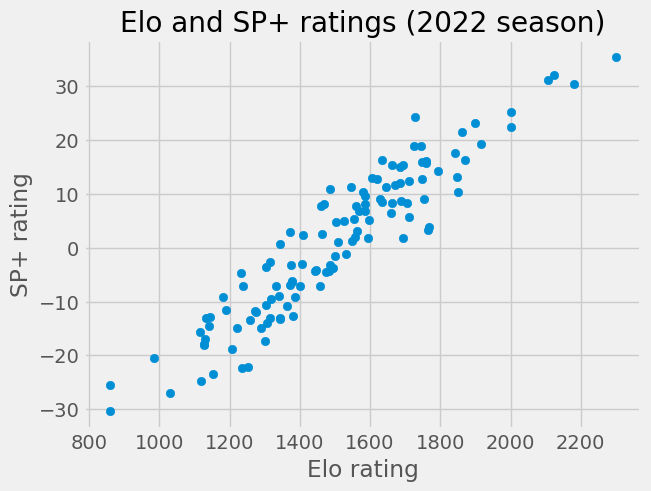

In [25]:
plt.scatter(df['elo'], df['sp'])

plt.xlabel('Elo rating')
plt.ylabel('SP+ rating')
plt.title('Elo and SP+ ratings (2022 season)')

In [26]:
plt.rcParams["figure.figsize"] = [20,10]

Text(0.5, 1.0, 'Elo and SP+ ratings (2022 season)')

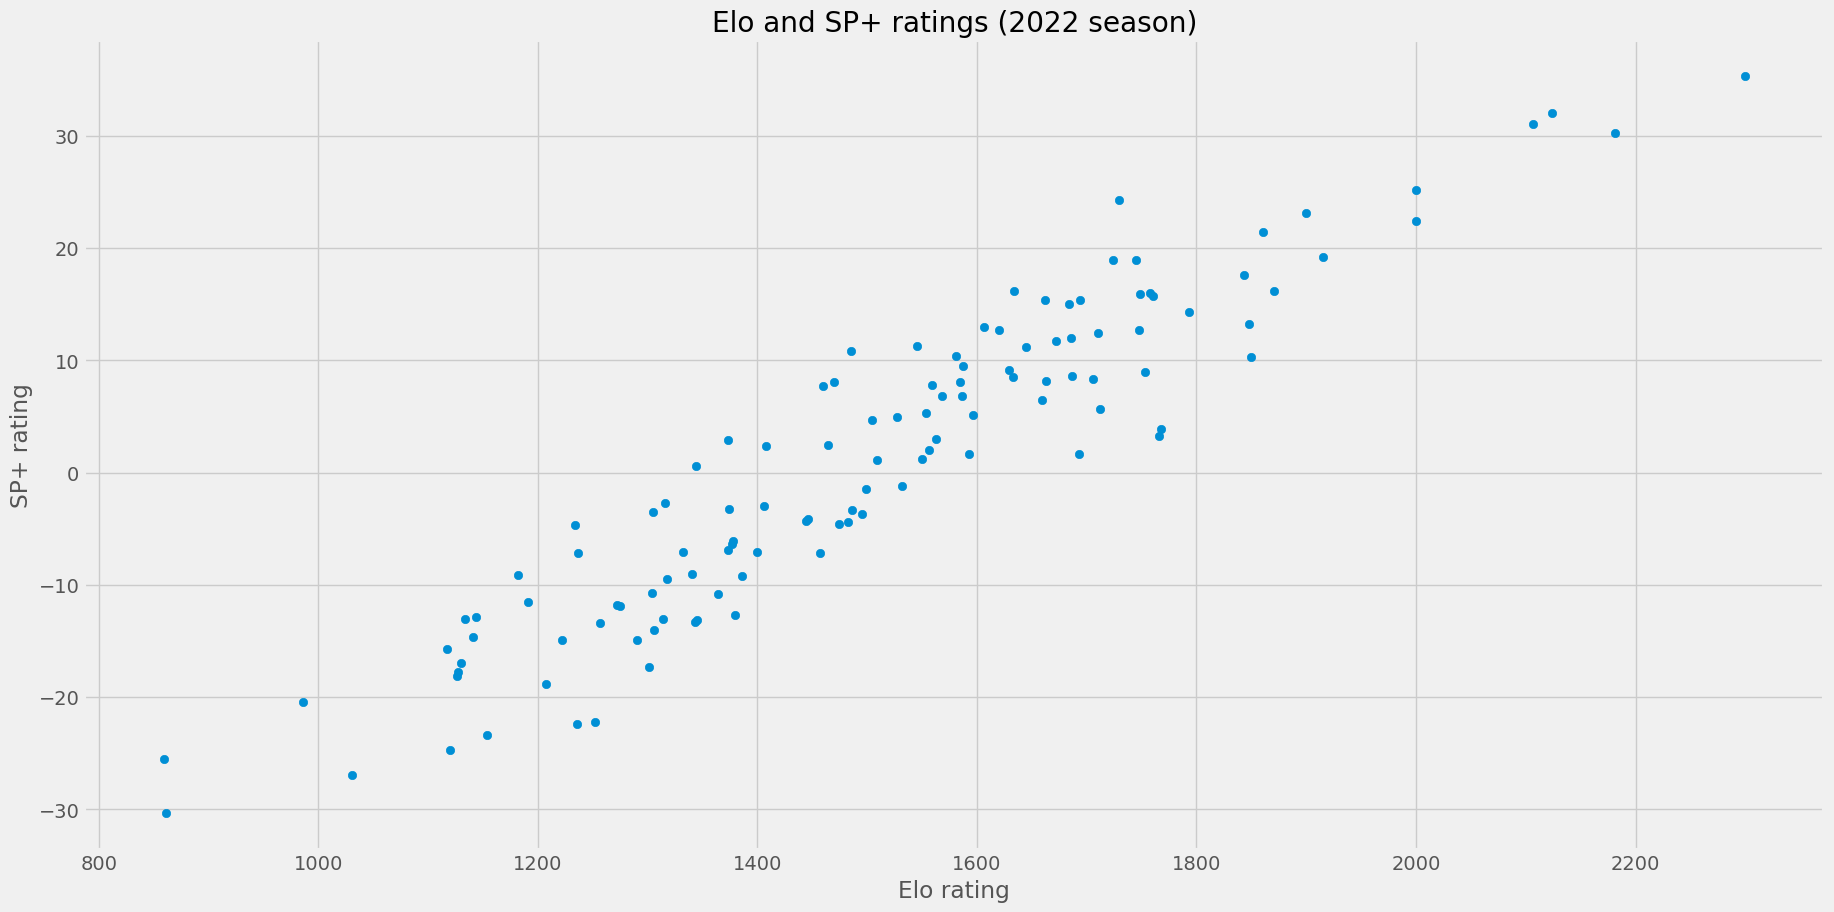

In [30]:
plt.scatter(df['elo'], df['sp'])

plt.xlabel('Elo rating')
plt.ylabel('SP+ rating')
plt.title('Elo and SP+ ratings (2022 season)')

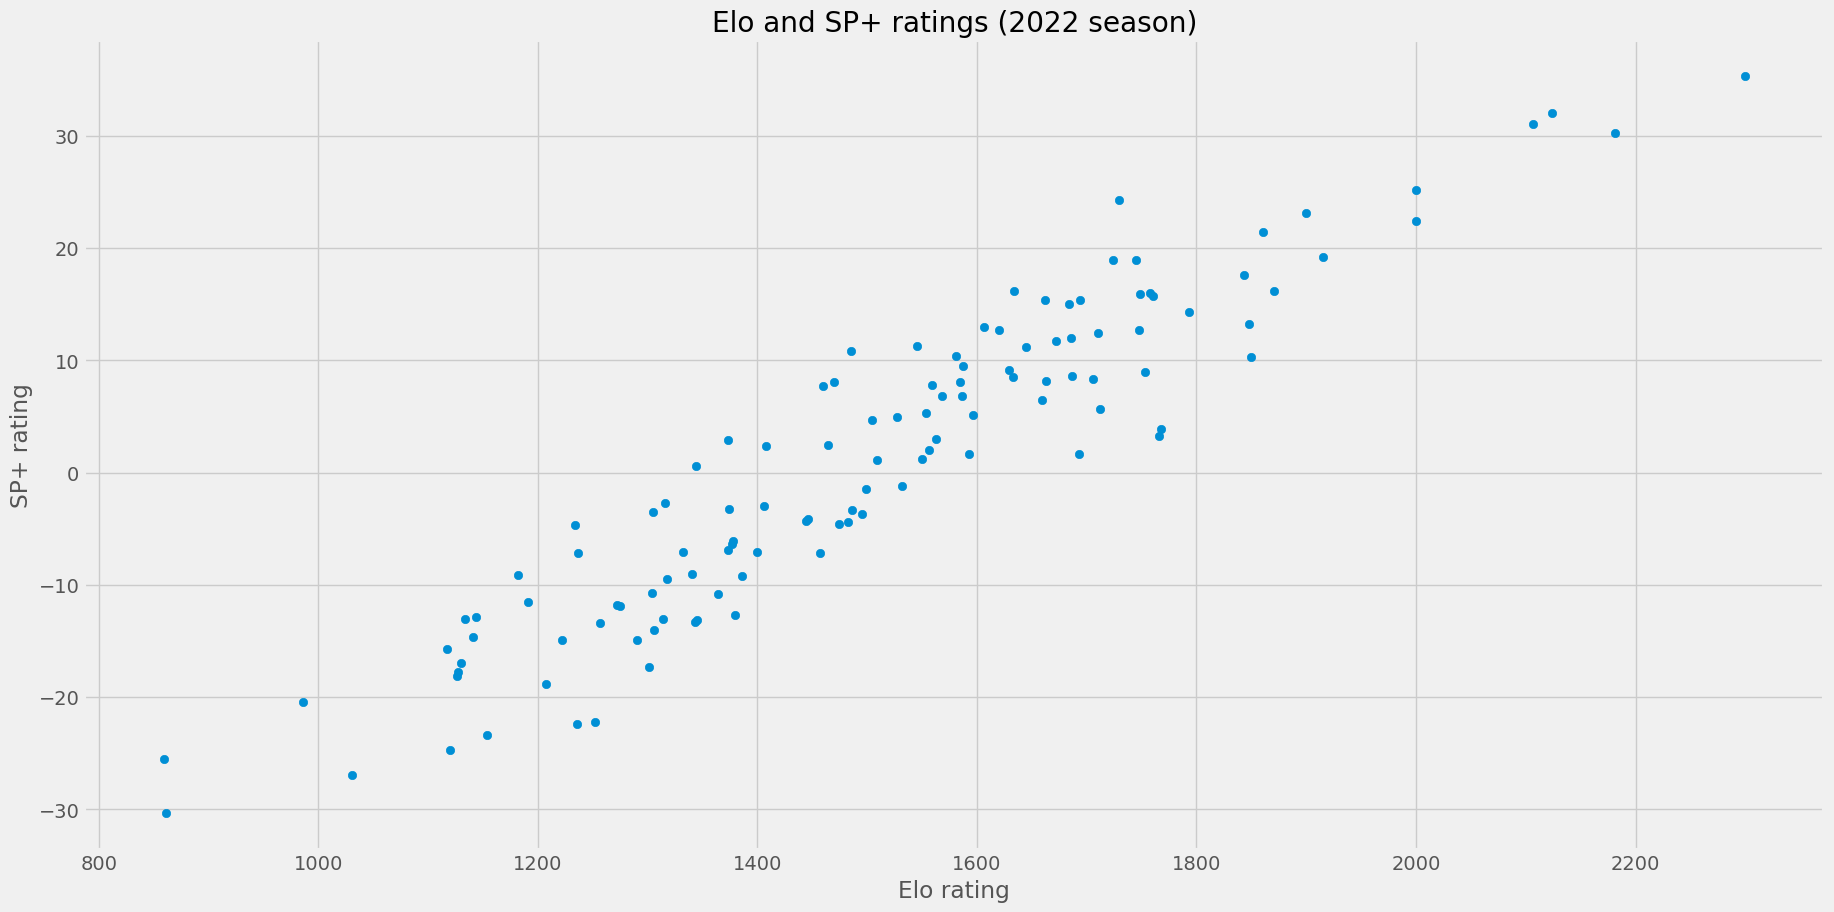

In [31]:
fig, ax = plt.subplots()
plt.scatter(df['elo'], df['sp'])

plt.xlabel('Elo rating')
plt.ylabel('SP+ rating')
plt.title('Elo and SP+ ratings (2022 season)')

plt.savefig("test.png")

In [44]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [33]:
def getImage(team):
    return OffsetImage(plt.imread(f'./logos/{team}.png'))

Text(0.5, 1.0, 'Elo and SP+ ratings (2022 season)')

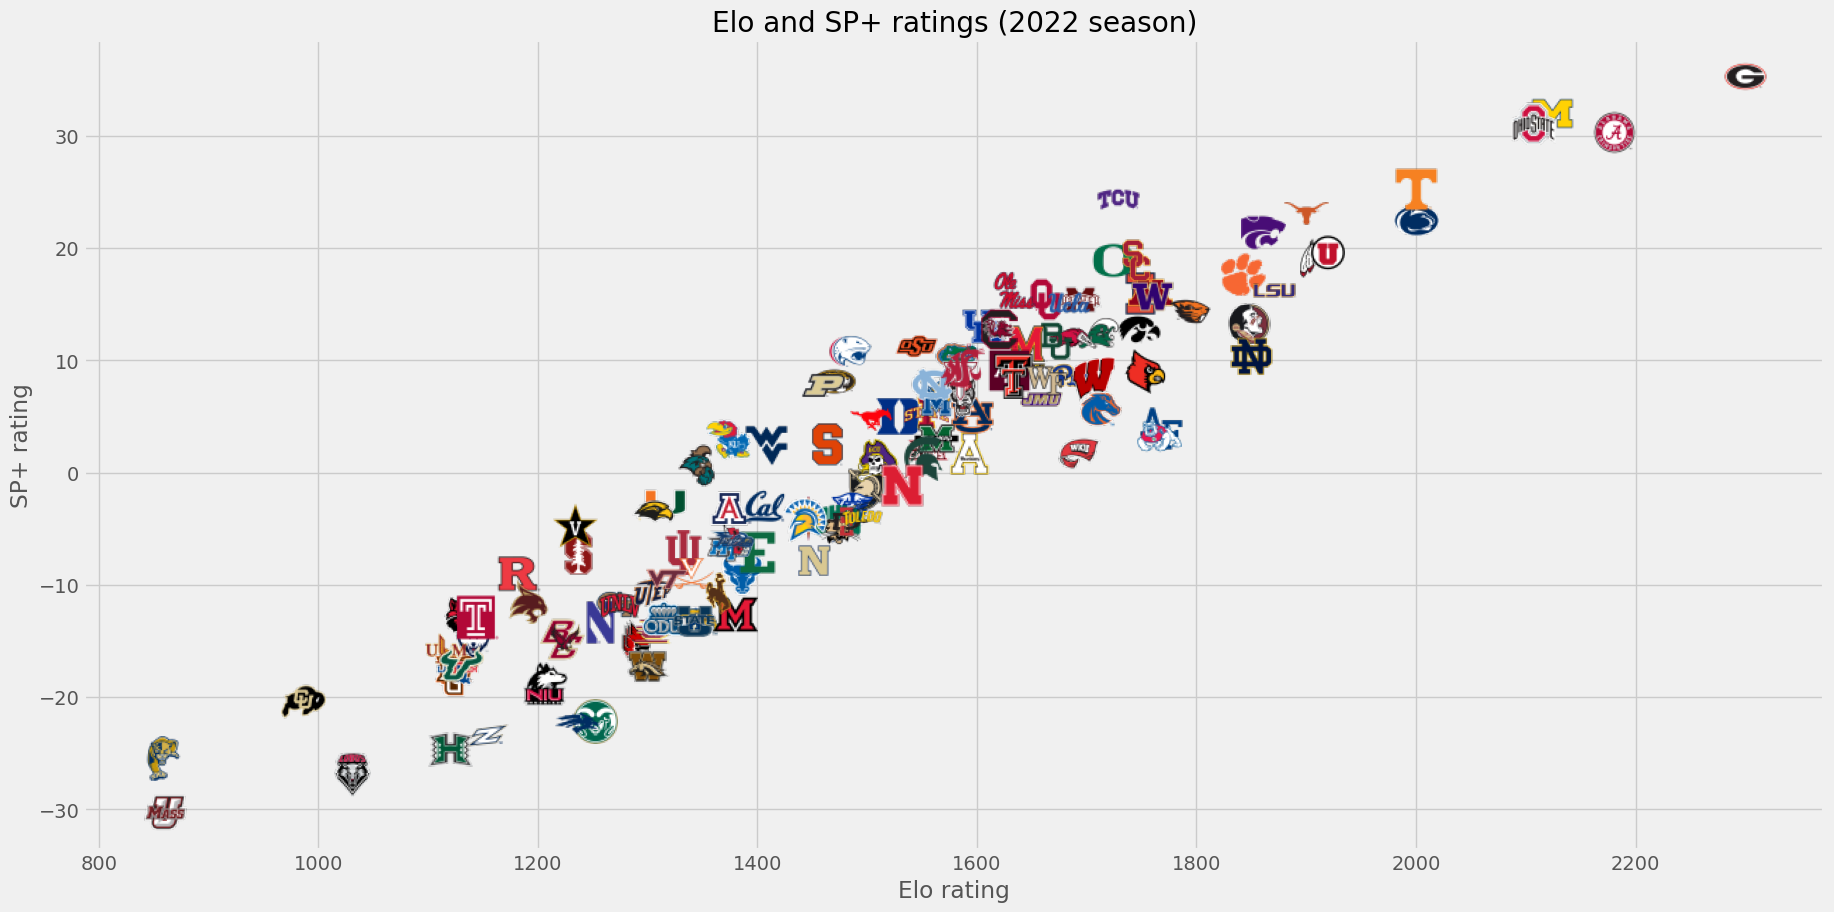

In [47]:
fig, ax = plt.subplots()
ax.scatter(df['elo'], df['sp'], alpha=0)

for index, r in df.iterrows():
    ab = AnnotationBbox(getImage(r.team), (r.elo, r.sp), frameon=False)
    ax.add_artist(ab)
    
plt.xlabel('Elo rating')
plt.ylabel('SP+ rating')
plt.title('Elo and SP+ ratings (2022 season)')

In [49]:
elos = ratings_api.get_elo_ratings(team='Michigan')
df = pd.DataFrame.from_records([e.to_dict() for e in elos])
df.head()

,year,team,conference,elo
0,1897,Michigan,Western,1760.0
1,1898,Michigan,Western,1803.0
2,1899,Michigan,Western,1786.0
3,1900,Michigan,Western,1635.0
4,1901,Michigan,Western,2432.0


Text(0.5, 1.0, 'Historical Elo Rating (Michigan)')

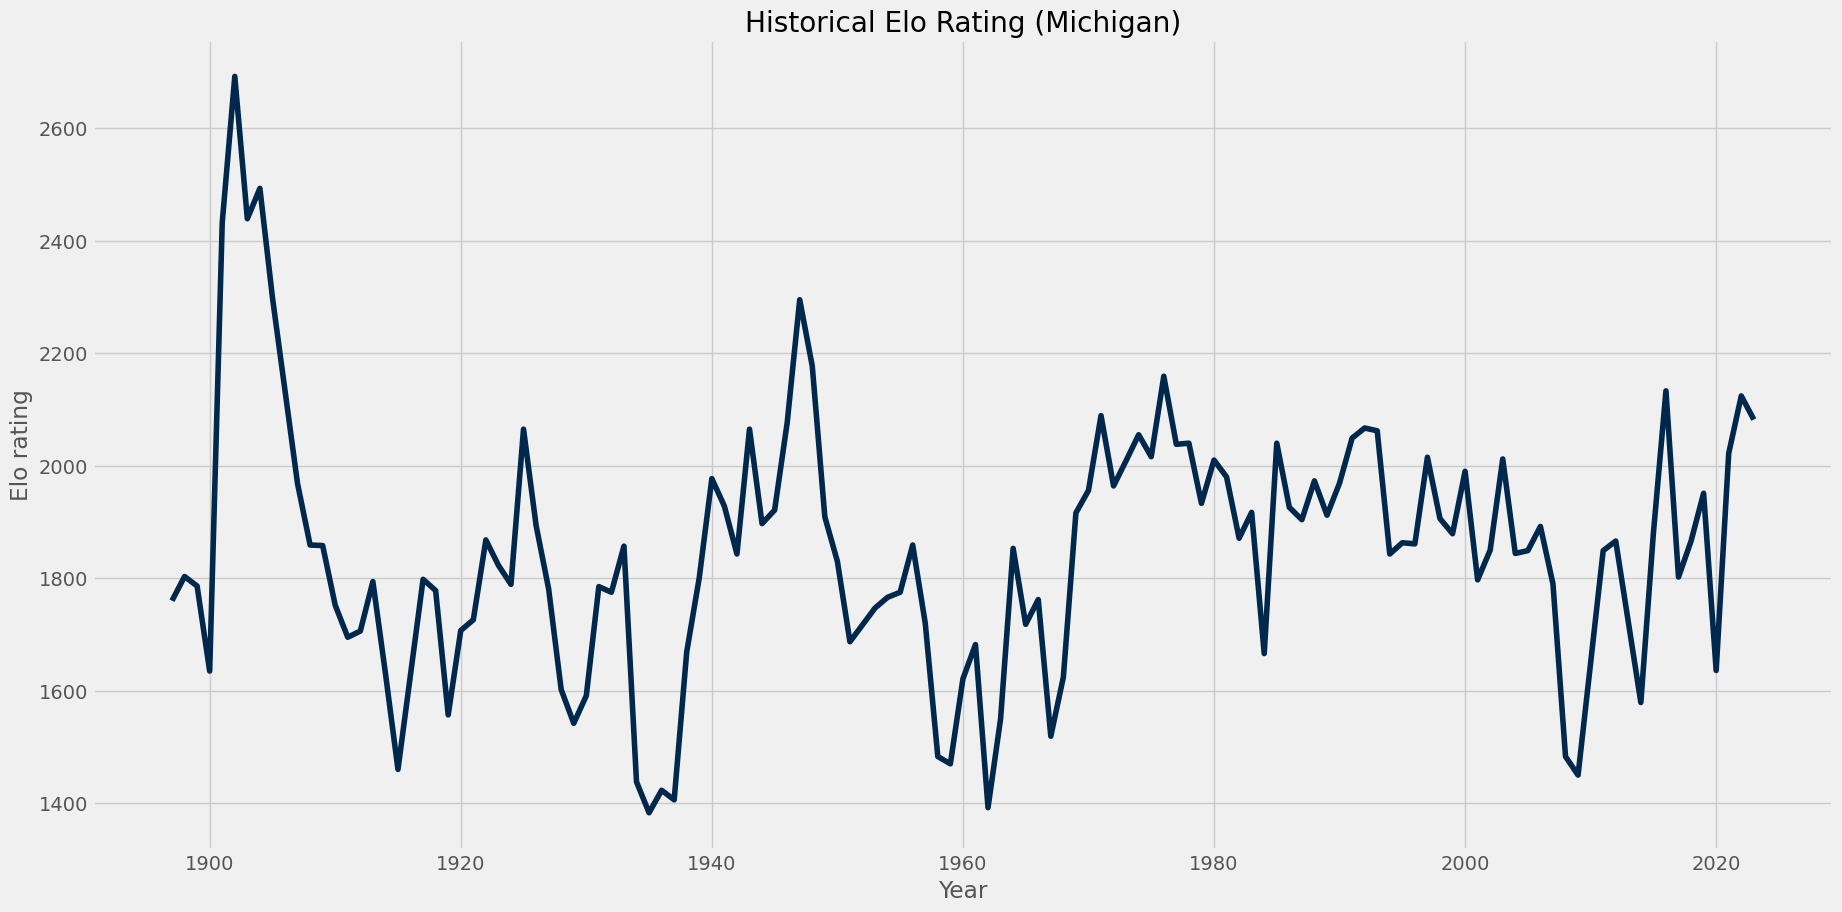

In [53]:
fig, ax = plt.subplots()

ax.plot(df['year'], df['elo'], color='#00274c')

plt.xlabel('Year')
plt.ylabel('Elo rating')
plt.title('Historical Elo Rating (Michigan)')

Text(0.5, 1.0, 'Historical Elo Rating (Michigan)')

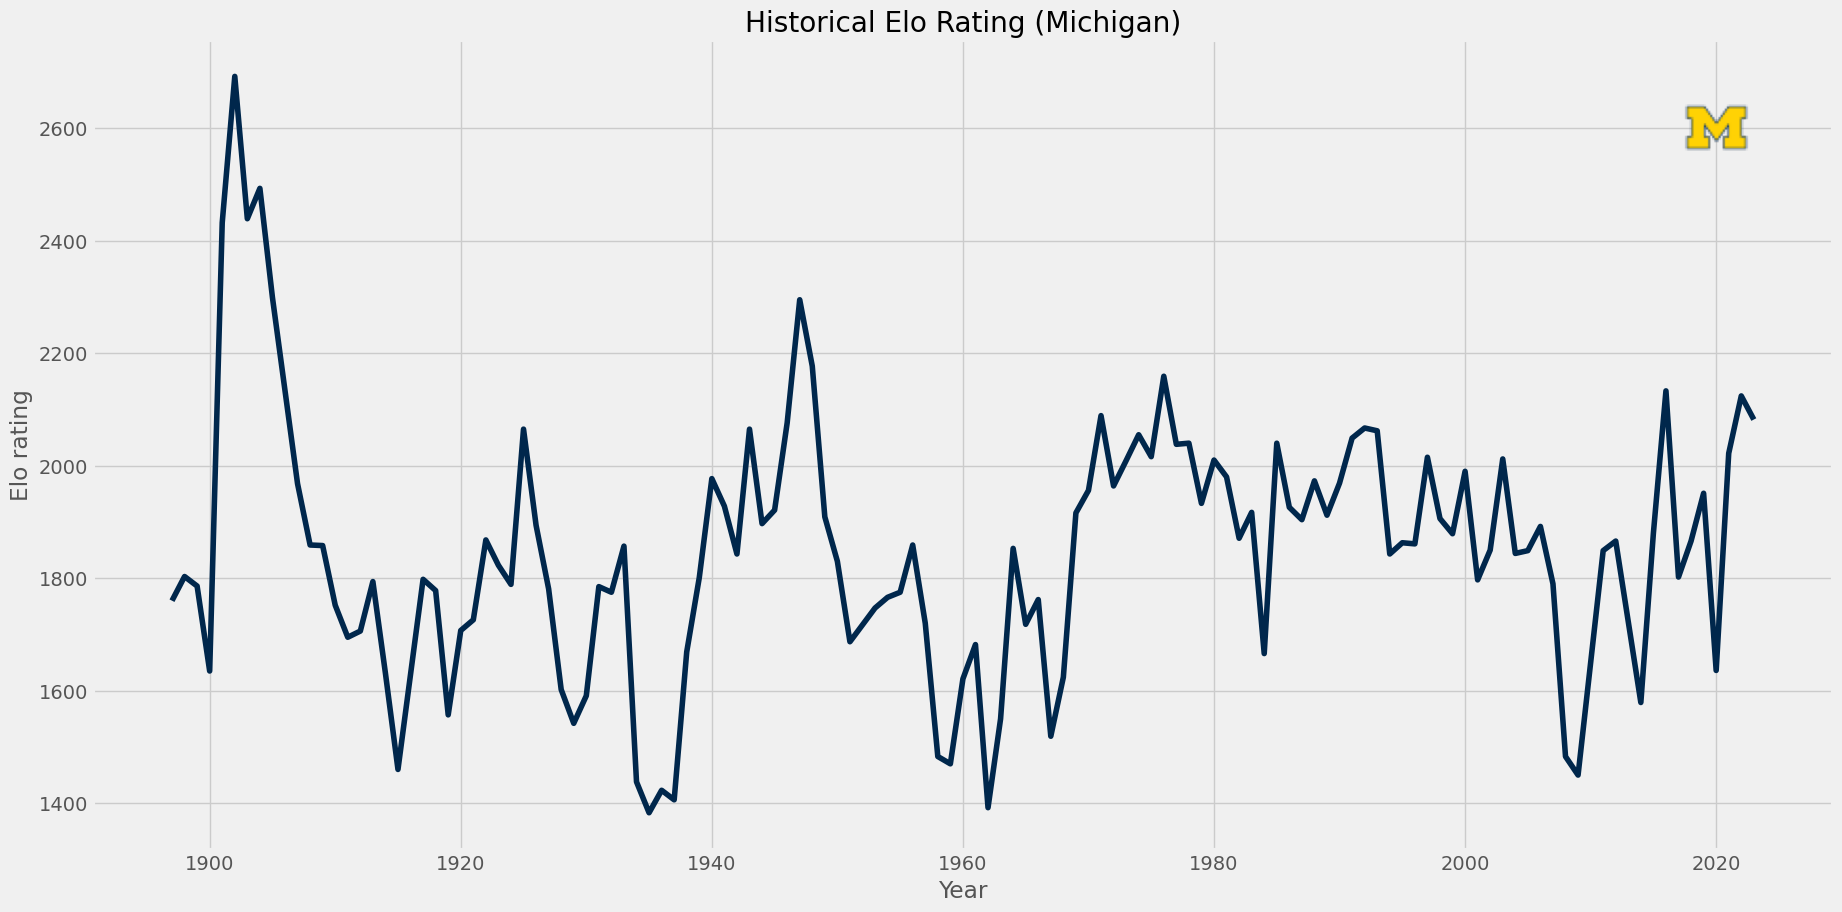

In [58]:
fig, ax = plt.subplots()

ax.plot(df['year'], df['elo'], color='#00274c')

logo = OffsetImage(plt.imread('./logos/Michigan.png'), zoom=1.5)
ab = AnnotationBbox(logo, (2020, 2600), frameon=False)
ax.add_artist(ab)

plt.xlabel('Year')
plt.ylabel('Elo rating')
plt.title('Historical Elo Rating (Michigan)')

Text(0.5, 1.0, 'Historical Elo Rating (Michigan)')

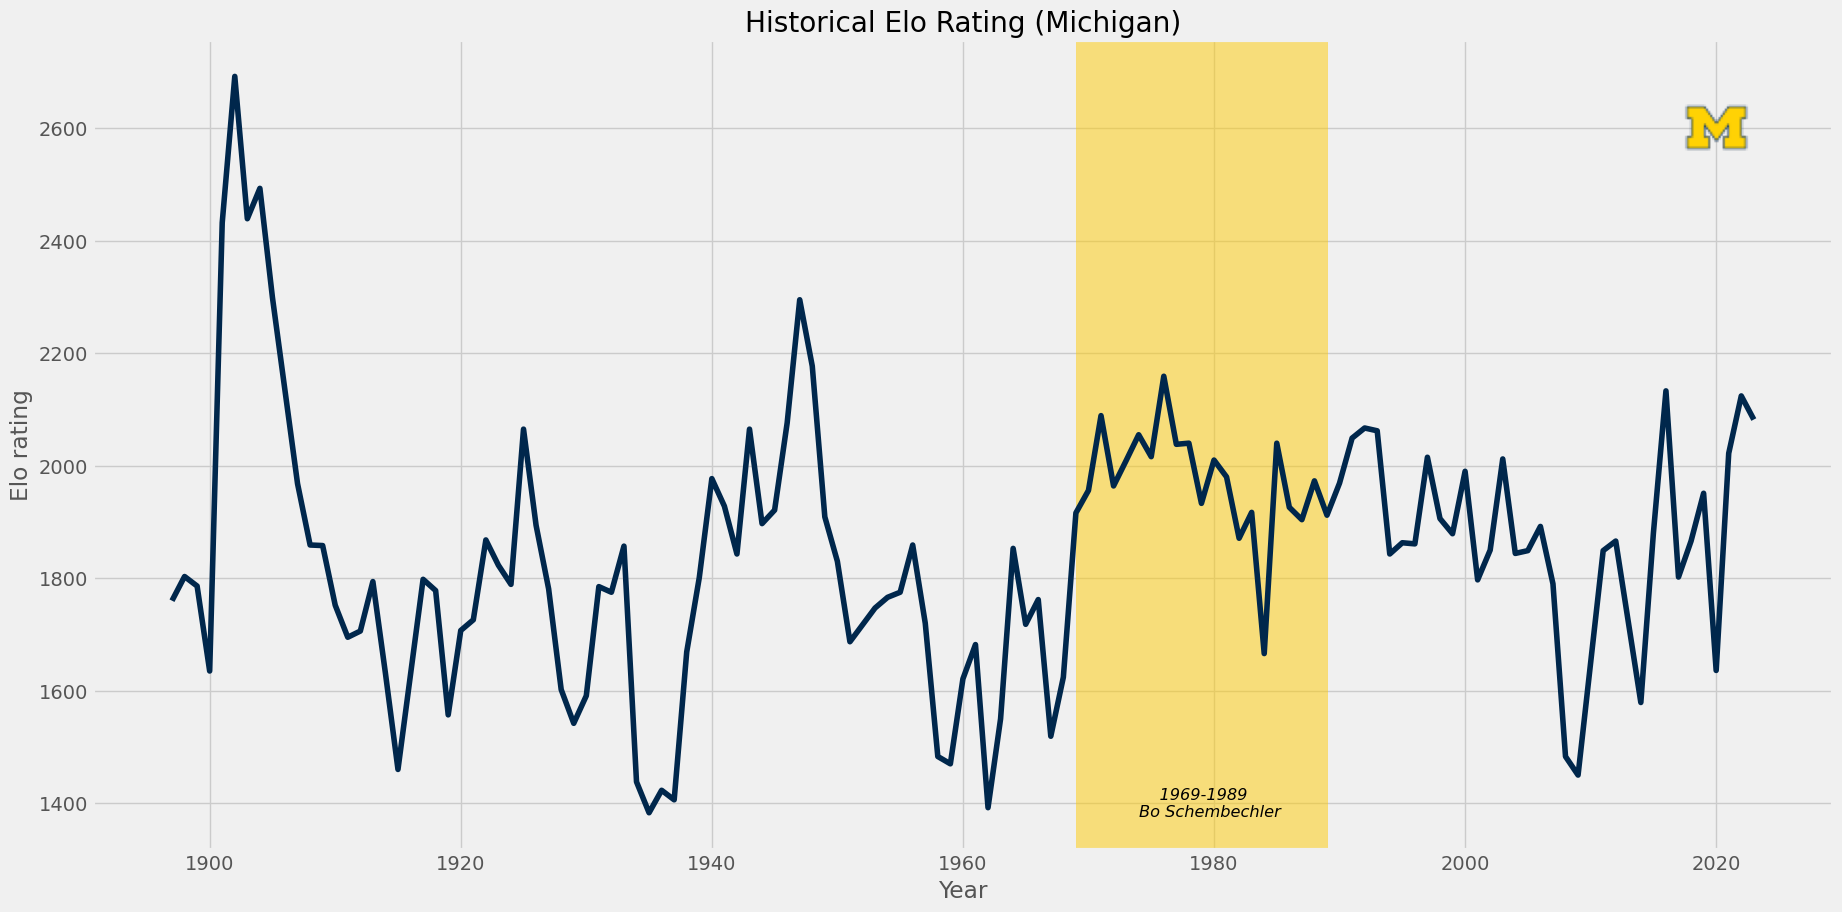

In [70]:
fig, ax = plt.subplots()

ax.plot(df['year'], df['elo'], color='#00274c')

logo = OffsetImage(plt.imread('./logos/Michigan.png'), zoom=1.5)
ab = AnnotationBbox(logo, (2020, 2600), frameon=False)
ax.add_artist(ab)

ax.axvspan(1969, 1989, alpha=0.5, color="#FFCB05")
ax.text(1974, 1400, '    1969-1989\nBo Schembechler', va='center', fontstyle='italic', fontsize='small')

plt.xlabel('Year')
plt.ylabel('Elo rating')
plt.title('Historical Elo Rating (Michigan)')

Text(0.5, 1.0, 'Historical Elo Rating (Michigan)')

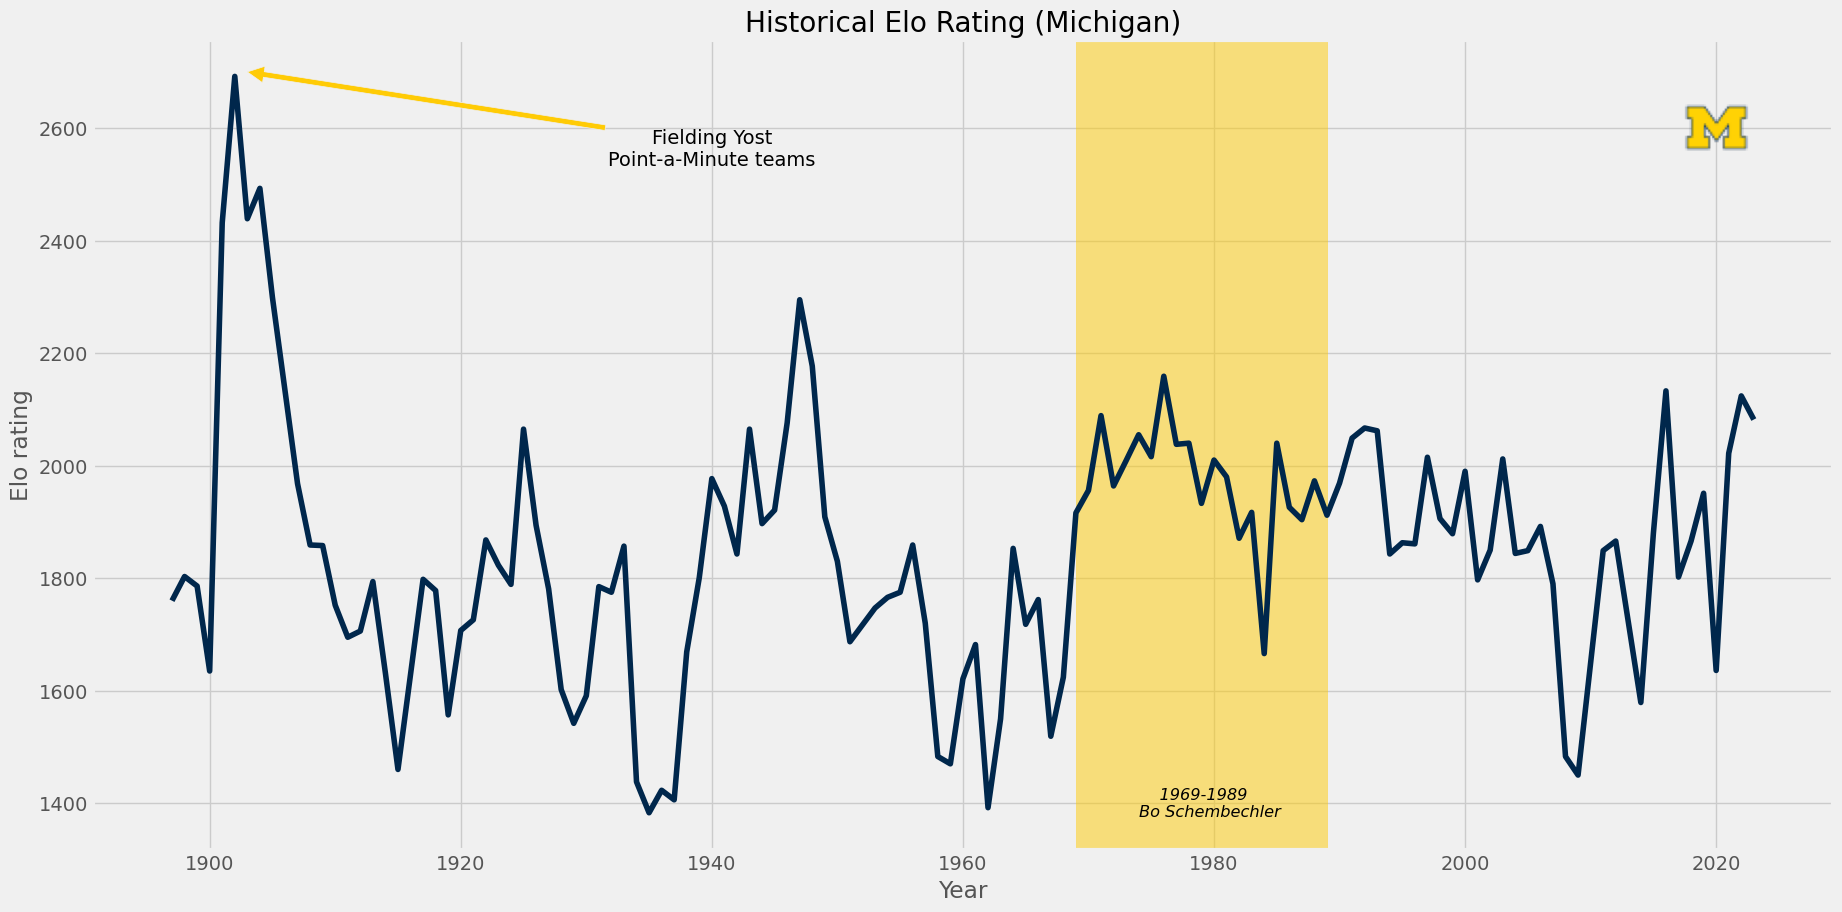

In [80]:
fig, ax = plt.subplots()

ax.plot(df['year'], df['elo'], color='#00274c')

logo = OffsetImage(plt.imread('./logos/Michigan.png'), zoom=1.5)
ab = AnnotationBbox(logo, (2020, 2600), frameon=False)
ax.add_artist(ab)

ax.axvspan(1969, 1989, alpha=0.5, color="#FFCB05")
ax.text(1974, 1400, '    1969-1989\nBo Schembechler', va='center', fontstyle='italic', fontsize='small')

ax.annotate("Fielding Yost\nPoint-a-Minute teams",
            xy=(1903, 2700), xycoords='data',
            xytext=(1940, 2600), textcoords='data',
            arrowprops=dict(facecolor='#FFCB05'),
            horizontalalignment='center', verticalalignment='top')

plt.xlabel('Year')
plt.ylabel('Elo rating')
plt.title('Historical Elo Rating (Michigan)')